In [1]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 1.1.2


In [12]:
from qiskit import QuantumCircuit

# Create a quantum circuit with one qbit
qc = QuantumCircuit(1)

qc.measure_all()

# Define initial_state as |1> = [0,1], and in plain English, it is a qubit resulting in the value 1 when observed.
initial_state = [0,1]

# Apply initialization operation on the qbit at position 0
qc.initialize(initial_state, 0)

In [18]:
# Prepare the simulation backend
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Create an AerSimulator with statevector
backend = AerSimulator()
#backend = Aer.get_backend('statevector_simulator')

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()


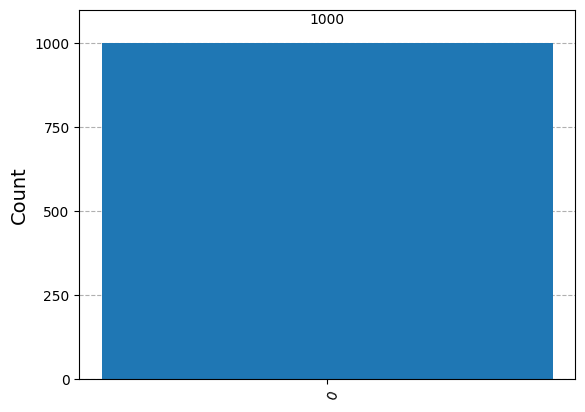

In [19]:
# The measured qbit
%matplotlib inline
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

In [20]:
# First attempt to superpose two states

# Define state |psi>
initial_state = [1, 1]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qbit in the state 'initial_state'
qc.initialize(initial_state,0)

# Create an AerSimulator with statevector
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()

# Plot the results
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [ ]:
# It didn’t quite work. It tells us: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [ ]:
# The amplitudes are the values in our array. They are proportional to proba-
# bilities. And all the probabilities should add up to exactly 1 (100%). We need
# to add weights to the quantum states |0⟩ and |1⟩. Let’s call them α and β .
# We weight |0⟩ with α and |1⟩ with β . Like this:
# |ψ⟩ =α|0⟩ +β |1⟩ = [1 ·α + 0 ·β]   [α] 
#                    [0 ·α + 1 ·β] = [β]
# Amplitudes are proportional to probabilities. We need to normalize them so
# that α2 +β 2 = 1. If both states |0⟩ and |1⟩ should have the same weight, then α = β .
# And therefore, we can solve our equation to α:
# α2 + α2 = 1 ⇔ 2 · α2 = 1 ⇔ α2 = 1/2 ⇔ α = 1/√2
# And we insert the value for both α andβ (both are equal). Let’s try this quan-
# tum state:
# |ψ⟩ = 1/√2|0⟩ + 1/√2|1⟩ = [1/√2]
#                           [1/√2]
# The corresponding array in Python is: [1/sqrt(2), 1/sqrt(2)]. Don’t forget to
# import sqrt.